In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
import osmnx as ox

In [4]:
labels = gpd.read_file('data/processed-labels/seattle_labels_all/seattle_labels_all.shp')
labels

,label_id,label_type,severity,gsv_panora,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.750000,-15.62500,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618599,-122.332787,POINT (-122.33279 47.61860)
1,85057,Obstacle,2.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,38.375000,-21.87500,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617805,-122.331886,POINT (-122.33189 47.61781)
2,85059,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.50000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617512,-122.331833,POINT (-122.33183 47.61751)
3,85060,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.50000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617519,-122.331879,POINT (-122.33188 47.61752)
4,85062,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,257.187500,-35.00000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617638,-122.332047,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,231270,CurbRamp,1.0,R-sTl5O6sOdVPurgTWy3EQ,1,332.468750,-35.00000,215.130295,-0.157570,155af0a9-4149-4436-8aa3-7573e160036d,47.540771,-122.267258,POINT (-122.26726 47.54077)
195539,231285,NoSidewalk,5.0,N5MrAAtHZO2JGXUrYAYnSQ,3,0.890625,-11.65625,179.161057,-5.825714,155af0a9-4149-4436-8aa3-7573e160036d,47.552292,-122.263443,POINT (-122.26344 47.55229)
195540,231338,CurbRamp,1.0,d3oBrJ-nDtKMwlE7svc6pg,1,253.562500,-35.00000,177.959915,-0.962440,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,47.563271,-122.281792,POINT (-122.28179 47.56327)
195541,231339,CurbRamp,1.0,AOIBJ12BjFanDJF1Ark05Q,1,110.312500,-35.00000,179.365723,-1.093400,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,47.563469,-122.281654,POINT (-122.28165 47.56347)


In [6]:
#read in road network
road = gpd.read_file('data/osm/osm-roads/osm-roads-main-types/osm-roads-main-types.shp')
road

,highway,osmid,geometry
0,secondary,426250827,"LINESTRING (-122.30363 47.64413, -122.30389 47..."
1,primary,4636259,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
2,primary,361443212,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
3,primary,431103955,"LINESTRING (-122.30363 47.64413, -122.30369 47..."
4,secondary,332060260,"LINESTRING (-122.30389 47.64403, -122.30395 47..."
...,...,...,...
61070,residential,340365566,"LINESTRING (-122.34106 47.63658, -122.34134 47..."
61071,residential,1138304083,"LINESTRING (-122.30830 47.49990, -122.30830 47..."
61072,residential,6399535,"LINESTRING (-122.30830 47.49933, -122.30741 47..."
61073,residential,1138304083,"LINESTRING (-122.30830 47.49933, -122.30830 47..."


In [7]:
#change coordinates
labels = labels.to_crs(epsg=2285)
road = road.to_crs(epsg=2285)

In [10]:
#spatial join project sidewalk labels to road geometry
labels_mapped_on_road = labels.sjoin_nearest(road, distance_col='distance_to_road')
labels_mapped_on_road

,label_id,label_type,severity,gsv_panora,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry,index_right,highway,osmid,distance_to_road
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.750000,-15.625000,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618599,-122.332787,POINT (1270633.170 229247.981),21750,primary,360390227,26.840775
16012,101038,CurbRamp,1.0,lq6_t34fb1KNDKlkTuiHnQ,2,24.008928,-12.232142,90.617798,1.109062,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.618610,-122.332863,POINT (1270614.439 229252.521),21750,primary,360390227,30.889038
29332,50620,Obstacle,2.0,eemEZQaDYheX10nNGQXmrw,1,207.062500,-7.312500,270.259186,0.335754,5b214fe5-91fb-4140-a799-7c71ebef4a32,47.618347,-122.332054,POINT (1270811.982 229152.642),21750,primary,360390227,63.822187
34329,90505,CurbRamp,1.0,Z_eTIaeGBVmlni66TM0GHQ,1,130.125000,0.000000,270.473511,0.796036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618481,-122.332962,POINT (1270589.060 229205.697),21750,primary,360390227,16.578757
65053,50615,Obstacle,5.0,1kBhCRlQSaqY0qcvuxPZvw,1,284.875000,0.000000,269.906311,-0.089508,5b214fe5-91fb-4140-a799-7c71ebef4a32,47.618610,-122.331650,POINT (1270913.559 229246.693),21750,primary,360390227,32.842592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195330,83549,CurbRamp,1.0,WiXiNJGoA9UWEEEE6c0c5w,2,130.982147,-7.678571,180.113525,-0.449966,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.522781,-122.364372,POINT (1262149.376 194457.376),27554,residential,6425745,28.522918
195412,84678,NoSidewalk,5.0,nF-a1NLnhGC8YsA3kkT1gg,1,270.000000,-10.000000,265.492859,-3.453133,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.526917,-122.284225,POINT (1281976.904 195581.785),20540,residential,6468277,1.851711
195412,84678,NoSidewalk,5.0,nF-a1NLnhGC8YsA3kkT1gg,1,270.000000,-10.000000,265.492859,-3.453133,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.526917,-122.284225,POINT (1281976.904 195581.785),20539,residential,6395562,1.851711
195499,230474,SurfaceProblem,2.0,oAYk9T5CCvMe9nzam-aTrw,2,150.125000,-10.946428,154.895691,-0.707500,78da7c35-4512-49df-a8f3-d5142b71df03,47.705845,-122.315910,POINT (1275407.687 260985.771),15613,residential,6483012,21.034969


In [48]:
#select only label_id, distance
distance = labels_mapped_on_road[['label_id','highway', 'distance_to_road']]

In [49]:
#drop duplicates
distance = distance.drop_duplicates(subset=['label_id'], keep='first')

In [50]:
# reset index
distance = distance.reset_index(drop=True)

In [51]:
#rename highway to way_type
distance = distance.rename(columns={'highway': 'way_type'})

In [52]:
distance

,label_id,way_type,distance_to_road
0,85055,primary,26.840775
1,101038,primary,30.889038
2,50620,primary,63.822187
3,90505,primary,16.578757
4,50615,primary,32.842592
...,...,...,...
195538,79526,residential,16.525129
195539,80203,residential,18.458203
195540,82090,residential,7.318016
195541,84678,residential,1.851711


In [53]:
# get the 95th percentile of the distance
distance_threshold = distance['distance_to_road'].quantile(0.95)
distance_threshold

36.092014108681816

<AxesSubplot: xlabel='distance_to_road', ylabel='Count'>

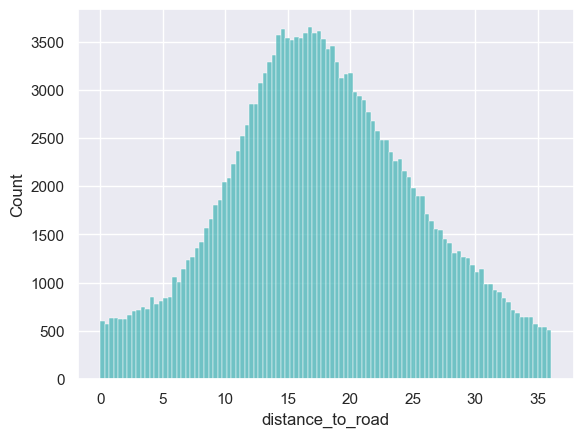

In [54]:
#plot only the labels that are within the 95th percentile
sns.histplot(data=distance[distance['distance_to_road'] < distance_threshold], x="distance_to_road", color="#47B5B7")

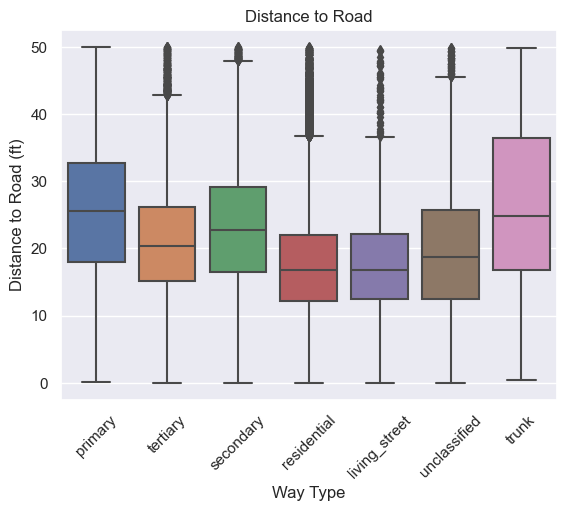

In [55]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=distance[distance['distance_to_road'] < 50], x="way_type", y="distance_to_road")
ax.set_title('Distance to Road')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Road (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [56]:
# save distance into a csv file
distance.to_csv('data/features/distance_to_road.csv', index=False)